<a href="https://colab.research.google.com/github/AnastasiiaDerevyanko/pp-2020/blob/master/Text_with_parsing_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Анализ текста**
В форму нижу загрузите текст Вашего произведения в формате **".txt"**  с именем **"text"**

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print("Вы загрузили файл «{name}» with length {length} bytes".format(name=fn, length=len(uploaded[fn])))

Saving text.txt to text.txt
Вы загрузили файл «text.txt» with length 87401 bytes


In [ ]:
handle = open(r"/content/text.txt", "r")
text = handle.read()
handle.close()


In [ ]:
#print(text)

In [ ]:
!pip install natasha
from natasha import (
    Segmenter,
    
    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    
    Doc
)

segmenter = Segmenter()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)

doc = Doc(text)

doc.segment(segmenter)
doc.tag_morph(morph_tagger)
doc.parse_syntax(syntax_parser)

sent = doc.sents[0]

     |████████████████████████████████| 34.4MB 113kB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 61kB 7.3MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 8.2MB 46.2MB/s 
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26100 sha256=c1f58a0b7252c254d264ae54d119158f6d3990800319142b09000bb2c1e5e928
  Stored in directory: /root/.cache/pip/wheels/f3/f2/66/e9c30d3e9499e65ea2fa0d07c002e64de63bd0adaa49c445bf
Successfully built intervaltree
  Found existing installation: intervaltree 2.1.0
    Uninstalling intervaltree-2.1.0:
      Successfully uninstalled intervaltree-2.1.0


In [ ]:
from razdel import tokenize, sentenize

In [ ]:
text_sentence=list(sentenize(text))
list_sentence=[]
for sentence in text_sentence:
  list_sentence+=(list(sentence)[2:])
#print(list_sentence)

In [ ]:
!pip install pymorphy2
import pymorphy2
!pip install pymorphy2-dicts-ru
morph = pymorphy2.MorphAnalyzer(path='/usr/local/lib/python3.6/dist-packages/pymorphy2_dicts_ru/data')

In [ ]:
from natasha import NewsNERTagger

ner_tagger = NewsNERTagger(emb)
doc.tag_ner(ner_tagger)

In [ ]:
from natasha import MorphVocab

morph_vocab = MorphVocab()



for span in doc.spans:
    span.normalize(morph_vocab)

dict_name={_.text: _.normal for _ in doc.spans}
#print(dict_name)

In [ ]:
text_string=''
for sentence in list_sentence:
  for key in dict_name:
    while key in sentence:
      sentence=sentence.replace(key," ")
  text_string+=sentence+' '
#print(text_string)

In [ ]:
!pip install nltk  # $ pip install nltk
import nltk
nltk.download('averaged_perceptron_tagger_ru')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger_ru to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.util import ngrams
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.collocations import *

In [ ]:
text_string = nltk.word_tokenize(text_string)
functors_pos = {''}  # function words CONJ - союзы ADV-PRO-местоимения PART-частицы или другие служебные слова 
text_string=''.join([word for word, pos in nltk.pos_tag(text, lang='rus')
        if pos not in functors_pos])
#print(text_string)

In [ ]:
text_lower=text_string.lower()
text_sentenize_lower=list(sentenize(text_lower))
sentences = nltk.sent_tokenize(text_string)
import nltk
import string
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
 
def tokenize_me(file_text):
    #firstly let's apply nltk tokenization
    tokens = nltk.word_tokenize(file_text)
 
    #let's delete punctuation symbols
    tokens = [i for i in tokens if ( i not in string.punctuation )]
 
    #deleting stop_words
    stop_words = stopwords.words('russian')
    stop_words.extend(['что','это','так', 'вот', 'быть', 'как', 'в', '—','-','–',',',';',':','я','он','она','они','оно','ты','вы','мы','который','какой','мой','твой','свой','наш','ваш','один','много'])
    tokens = [i for i in tokens if ( i not in stop_words )]
 
    #cleaning words
    tokens = [i.replace("«", "").replace("»", "") for i in tokens]
 
    return tokens

text_sentense=[]
text_sentense_token_list=[]
sentences = nltk.sent_tokenize(text_lower)
text_sentense_token=[]

for sentence in sentences:
    text_sentense_token.append(tokenize_me(sentence))
    text_sentense_token_list.append(" ".join(tokenize_me(sentence)))
text_sentense_token_string=' '.join(text_sentense_token_list)
#print(text_sentense_token)
text_word=text_sentense_token_string.split()
#print(text_word)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from nltk.util import ngrams
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.collocations import *

In [ ]:
text_word_normalize=[]
for word in text_word:
    p = morph.parse(word)[0]
    text_word_normalize.append(p.normal_form)
#print(text_word_normalize)

In [ ]:
from nltk.stem import SnowballStemmer
snowball = SnowballStemmer(language="russian")
token_stemm=[]
for token in text_word_normalize:
  p = morph.parse(token)[0]
  token_stemm.append(p.normal_form)
  #print(p.normal_form)

In [ ]:
from nltk import ngrams

sentence = 'this is a foo bar sentences and i want to ngramize it'
token_stemm_string=''
token_stemm_string=' '.join(token_stemm)
#print(token_stemm_string)
n = 2
n2grams = ngrams(token_stemm, n)

ngrams_dict={}

#count=1
grams_string=''
for grams in n2grams:
  grams_string=' '.join(map(str,grams))
  ngrams_dict.update({grams_string:token_stemm_string.count(grams_string)})
#print(ngrams_dict)

In [ ]:
list_ngrams_dict=list(ngrams_dict.items())

In [ ]:
list_ngrams_dict.sort(key=lambda i: i[1])

In [ ]:
import collections

In [ ]:
from collections import Counter
import math

def compute_tfidf(corpus):
  def compute_tf(text):
    tf_text = Counter(text)
    for i in tf_text:
      tf_text[i] = tf_text[i]/float(len(text))
    return tf_text
  def compute_idf(word, corpus):
    return math.log10(len(corpus)/sum([1.0 for i in corpus if word in i]))
    
  documents_list = []
  for text in corpus:
    tf_idf_dictionary = {}
    computed_tf = compute_tf(text)
    for word in computed_tf:
      tf_idf_dictionary[word] = computed_tf[word] * compute_idf(word, corpus)
    documents_list.append(tf_idf_dictionary)
  return documents_list

text_tfidf=compute_tfidf(text_sentense_token)
#print(text_tfidf)

In [ ]:
tfidf_text={}
for sentence in text_tfidf:
  for key,value in sentence.items():
    tfidf_text.update({value:key})
#print(tfidf_text)


In [ ]:
key_sort=[]
for key in tfidf_text:
  key_sort.append(key)
key_sort=sorted(key_sort,reverse=True)
#print(key_sort)

In [ ]:
stem_token=[]
for key in key_sort:
  stem_token.append(tfidf_text[key])
#print(stem_token)

In [ ]:
!pip install pymorphy2
import pymorphy2
!pip install pymorphy2-dicts-ru
morph = pymorphy2.MorphAnalyzer(path='/usr/local/lib/python3.6/dist-packages/pymorphy2_dicts_ru/data')

In [ ]:
from nltk.stem import SnowballStemmer
snowball = SnowballStemmer(language="russian")
token_stemm=[]
for token in stem_token:
  p = morph.parse(token)[0]
  token_stemm.append(p.normal_form)
  #print(p.normal_form)

In [ ]:
stem_dict={}
for word  in token_stemm:
  stem_dict.update({word:token_stemm.count(word)})
#print(stem_dict)

In [ ]:
list_stem_dict = list(stem_dict.items())
list_stem_dict.sort(key=lambda i: i[1])
list_stem_dict_end=[]
for i in list_stem_dict[-20:]:
  #print(i[0], ':', i[1])
  list_stem_dict_end.append(i[0])
print(list_stem_dict_end)

['процесс', 'в.', 'материальный', 'культурный', 'лишь', 'время', 'жизнь', 'цивилизация', 'мир', 'деятельность', 'являться', 'духовный', 'общество', 'научно-технический', 'техника', '', 'развитие', 'прогресс', 'человек', 'культура']


In [ ]:
list_ngrams_dict_end=[]
for key in list_ngrams_dict[-20:]:
  list_ngrams_dict_end.append(key[0])
  print(key)


('культура цивилизация', 5)
('реализация духовный', 5)
('материальный культура', 5)
('культурный деятельность', 5)
('индустриальный прогресс', 5)
('режим доступ', 5)
('дата доступ', 5)
('доступ http', 5)
('такой образ', 6)
('духовный ценность', 8)
('xix в.', 8)
('картина мир', 9)
('развитие культура', 10)
('деятельность человек', 10)
('развитие наука', 10)
('материальный духовный', 12)
('духовный культура', 13)
('наука техника', 18)
('научно-технический прогресс', 23)
('технический прогресс', 24)


Выше приведен небольшой анализ текста. Основоваясь на проанализированных данных, заполните формы ниже, чтобы более точно сгенерировать внешность основных героев, место действия и другие объекты.
Например, если Вы хотите описать внешность маленького мальчика с черными волосами, то вводите следующие фразы "портретная фотография маленького мальчика с черными волосами", "портрет мальчика с черными волосами", также вводите фразы на английском или других языках "the portrait photo of little boy with black hair". Это поможет для сбора большего количества изображений, для последующей генерации персонажей.
Также, Вы можете добавить не только описание персонажей, но и описание тех объектов, которые Вы хотите поместить на обложку. Но мы не советуем добавлять на обложку множество маленьких деталей и объектов, так как это значительно увеличит время генерации изображений.

# Вам на выбор предложено два способа генерации/создания обложек каждый из которых имеет, как и свои преимущества, так и недостатки.


1.   **Генерация изображений с использованием нейронных сетей** В этом случае собирается опорный датасет, с большим количеством изображений, который впоследствии будет использоваться для генерации картинок. Этот подход очень долгий(20-30 часов в зависимости от количества объектов и их сложности), Вам потребуется запас терпения и времени, но, взамен, изображения, полученные на выходе будут полностью оригинальными, и Вы можете использовать их без опасения нарушить чье-либо авторское право.
2.   **Сбор необходимых изображений с открытых источников** Этот подход в разы проще и быстрее, он позволяет Вам почти сразу же получить необходимые изображения. Но некоторые из них могут быть защищены авторским правом, поэтому будьте осторожны при использовании скачанных изображений в коммерческих целях.



# Подготовка к поиску изображений

In [ ]:
%pip install Selenium
%pip install chromedriver
!git clone https://github.com/Joeclinton1/google-images-download.git
!cd google-images-download && sudo python setup.py install


     |████████████████████████████████| 911kB 5.6MB/s 
     |████████████████████████████████| 14.3MB 304kB/s 
Cloning into 'google-images-download'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 666 (delta 6), reused 2 (delta 0), pack-reused 654
Receiving objects: 100% (666/666), 295.55 KiB | 7.21 MiB/s, done.
Resolving deltas: 100% (388/388), done.
running install
running bdist_egg
running egg_info
creating google_images_download.egg-info
writing google_images_download.egg-info/PKG-INFO
writing dependency_links to google_images_download.egg-info/dependency_links.txt
writing entry points to google_images_download.egg-info/entry_points.txt
writing requirements to google_images_download.egg-info/requires.txt
writing top-level names to google_images_download.egg-info/top_level.txt
writing manifest file 'google_images_download.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in

Вы уже провели анализ текста, ниже предлагаю Вам выбрать слова или же фразы, которые будут использоваться либо для генерации, либо для поиска необходимых изображений. Вы также можете вписать свои слова для поиска, если собранных из текста данных недостаточно, или же Вы хотите добавить на обложку какие-либо дополнительные элементы.





В зависмоти от выбранного Вами пути отметьте слова или словосочетания
P.S. Не советуем выбирать сликшом много объектов, так как это увеличит время генерации изображений и итоговой обложки

# Сначала отметьте галочками все слова галочками, потом запустите ячейку кода

In [ ]:
#@title Выберите слова для поиска/генерации(для генерации иногда предпочтительнее использовать словосочетания)
counter=1
for i in list_stem_dict_end:
  print(str(counter)+" : "+i)
  counter+=1

1 : процесс
2 : в.
3 : материальный
4 : культурный
5 : лишь
6 : время
7 : жизнь
8 : цивилизация
9 : мир
10 : деятельность
11 : являться
12 : духовный
13 : общество
14 : научно-технический
15 : техника
16 : 
17 : развитие
18 : прогресс
19 : человек
20 : культура


In [ ]:
#@title Выбор слов

my_file1 = open('/content/text_words.txt', 'a')
one = False #@param {type:"boolean"}
if one==True:
  my_file1.write(list_stem_dict_end[0]+'\n')
two = False #@param {type:"boolean"}
if two==True:
  my_file1.write(list_stem_dict_end[1]+'\n')
three = False #@param {type:"boolean"}
if three==True:
  my_file1.write(list_stem_dict_end[2]+'\n')
four = False #@param {type:"boolean"}
if four==True:
  my_file1.write(list_stem_dict_end[3]+'\n')
five = False #@param {type:"boolean"}
if five==True:
  my_file1.write(list_stem_dict_end[4]+'\n')
six = False #@param {type:"boolean"}
if six==True:
  my_file1.write(list_stem_dict_end[5]+'\n')
seven = False #@param {type:"boolean"}
if seven==True:
  my_file1.write(list_stem_dict_end[6]+'\n')
eight = False #@param {type:"boolean"}
if eight==True:
  my_file1.write(list_stem_dict_end[7]+'\n')
night= False #@param {type:"boolean"}
if night==True:
  my_file1.write(list_stem_dict_end[8]+'\n')
ten= False #@param {type:"boolean"}
if ten==True:
  my_file1.write(list_stem_dict_end[9]+'\n')
eleven= False #@param {type:"boolean"}
if eleven==True:
  my_file1.write(list_stem_dict_end[10]+'\n')
twelve= False #@param {type:"boolean"}
if twelve==True:
  my_file1.write(list_stem_dict_end[11]+'\n')
thirteen= False #@param {type:"boolean"}
if thirteen==True:
  my_file1.write(list_stem_dict_end[12]+'\n')
fourteen= False #@param {type:"boolean"}
if fourteen==True:
  my_file1.write(list_stem_dict_end[13]+'\n')
fifteen= False #@param {type:"boolean"}
if fifteen==True:
  my_file1.write(list_stem_dict_end[14]+'\n')
sixteen= False #@param {type:"boolean"}
if sixteen==True:
  my_file1.write(list_stem_dict_end[15]+'\n')
seventeen= False #@param {type:"boolean"}
if seventeen==True:
  my_file1.write(list_stem_dict_end[16]+'\n')
eighteen= True #@param {type:"boolean"}
if eighteen==True:
  my_file1.write(list_stem_dict_end[17]+'\n')
nineteen= True #@param {type:"boolean"}
if nineteen==True:
  my_file1.write(list_stem_dict_end[18]+'\n')
twenty= True #@param {type:"boolean"}
if twenty==True:
  my_file1.write(list_stem_dict_end[19]+'\n')
my_file1.close()



In [ ]:
#@title Описание персонажей/объектов (введите слово)
the_object_description = "\u041B\u0435\u0432 \u041D\u0438\u043A\u043E\u043B\u0430\u0435\u0432\u0438\u0447 \u0422\u043E\u043B\u0441\u0442\u043E\u0439" #@param {type:"string"}

my_file1 = open('/content/text_words.txt', 'a')
my_file.write(the_object_description+'\n')
my_file.close()



# Выбор словосочетаний

In [ ]:
#@title Выберите словосочетания для поиска/генерации изображений
counter=1
for i in list_ngrams_dict_end:
  print(str(counter)+" : "+i)
  counter+=1

1 : культура цивилизация
2 : реализация духовный
3 : материальный культура
4 : культурный деятельность
5 : индустриальный прогресс
6 : режим доступ
7 : дата доступ
8 : доступ http
9 : такой образ
10 : духовный ценность
11 : xix в.
12 : картина мир
13 : развитие культура
14 : деятельность человек
15 : развитие наука
16 : материальный духовный
17 : духовный культура
18 : наука техника
19 : научно-технический прогресс
20 : технический прогресс


In [ ]:
#@title Выбор словосочетаний

my_file2 = open('/content/phrases.txt', 'a')
one = False #@param {type:"boolean"}
if one==True:
  my_file2.write(list_ngrams_dict_end[0]+'\n')
two = False #@param {type:"boolean"}
if two==True:
  my_file2.write(list_ngrams_dict_end[1]+'\n')
three = False #@param {type:"boolean"}
if three==True:
  my_file2.write(list_ngrams_dict_end[2]+'\n')
four = False #@param {type:"boolean"}
if four==True:
  my_file2.write(list_ngrams_dict_end[3]+'\n')
five = False #@param {type:"boolean"}
if five==True:
  my_file2.write(list_ngrams_dict_end[4]+'\n')
six = False #@param {type:"boolean"}
if six==True:
  my_file2.write(list_ngrams_dict_end[5]+'\n')
seven = False #@param {type:"boolean"}
if seven==True:
  my_file2.write(list_ngrams_dict_end[6]+'\n')
eight = False #@param {type:"boolean"}
if eight==True:
  my_file2.write(list_ngrams_dict_end[7]+'\n')
night= False #@param {type:"boolean"}
if night==True:
  my_file2.write(list_ngrams_dict_end[8]+'\n')
ten= False #@param {type:"boolean"}
if ten==True:
  my_file2.write(list_ngrams_dict_end[9]+'\n')
eleven= False #@param {type:"boolean"}
if eleven==True:
  my_file2.write(list_ngrams_dict_end[10]+'\n')
twelve= False #@param {type:"boolean"}
if twelve==True:
  my_file2.write(list_ngrams_dict_end[11]+'\n')
thirteen= False #@param {type:"boolean"}
if thirteen==True:
  my_file2.write(list_ngrams_dict_end[12]+'\n')
fourteen= False #@param {type:"boolean"}
if fourteen==True:
  my_file2.write(list_ngrams_dict_end[13]+'\n')
fifteen= True #@param {type:"boolean"}
if fifteen==True:
  my_file2.write(list_ngrams_dict_end[14]+'\n')
sixteen= False #@param {type:"boolean"}
if sixteen==True:
  my_file2.write(list_ngrams_dict_end[15]+'\n')
seventeen= False #@param {type:"boolean"}
if seventeen==True:
  my_file2.write(list_ngrams_dict_end[16]+'\n')
eighteen= False #@param {type:"boolean"}
if eighteen==True:
  my_file2.write(list_ngrams_dict_end[17]+'\n')
nineteen= True #@param {type:"boolean"}
if nineteen==True:
  my_file2.write(list_ngrams_dict_end[18]+'\n')
twenty= False #@param {type:"boolean"}
if twenty==True:
  my_file2.write(list_ngrams_dict_end[19]+'\n')
my_file2.close()


In [ ]:
#@title Напишите словосочетания для поиска/генерации изображений
the_object_description = "\u041B\u0435\u0432 \u041D\u0438\u043A\u043E\u043B\u0430\u0435\u0432\u0438\u0447 \u0422\u043E\u043B\u0441\u0442\u043E\u0439" #@param {type:"string"}

my_file1 = open('/content/phrases.txt', 'a')
my_file1.write(the_object_description+'\n')
my_file1.close()


# Поиск изображений в интернете

In [ ]:
!pip install googletrans
from googletrans import Translator
translator = Translator()

     |████████████████████████████████| 61kB 3.0MB/s 
     |████████████████████████████████| 51kB 5.1MB/s 
     |████████████████████████████████| 972kB 7.1MB/s 
     |████████████████████████████████| 71kB 7.3MB/s 
     |████████████████████████████████| 61kB 6.2MB/s 
     |████████████████████████████████| 102kB 7.2MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=a5b569ac4f49c08adb5d2acc4fb8a1bd5ebdc405708b46bf8752f47f3d336999
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=4e010f1c57d42a4ed36acf488381f330d522a89b6f3a3469996abeb5709c00f0
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [ ]:
my_file2 = open('/content/phrases.txt')
my_file3 = open('/content/phrases_english.txt', 'a')
my_file1 = open('/content/text_words.txt')
my_file4=open('/content/text_words_english.txt', 'a')
for line in my_file2:
  result = translator.translate(line)
  r=result.text
  my_file3.write(r+"\n")
for line in my_file1:
  result = translator.translate(line)
  r=result.text
  my_file4.write(r+"\n")
my_file2.close()
my_file3.close()
my_file1.close()
my_file4.close()

AttributeError: ignored

In [ ]:
import requests 
from bs4 import BeautifulSoup
import os

In [ ]:
import re
import sys
import http.cookiejar
import json
import urllib.request, urllib.error, urllib.parse

In [ ]:
def get_soup(url,header):
    #return BeautifulSoup(urllib2.urlopen(urllib2.Request(url,headers=header)),
    # 'html.parser')
    return BeautifulSoup(urllib.request.urlopen(
        urllib.request.Request(url,headers=header)),
        'html.parser')
DIR="Pictures"
header={'User-Agent':"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/43.0.2357.134 Safari/537.36"}

In [ ]:
os.mkdir("parser_photos")

In [ ]:
#@title Поиск изображений по словам
i=1

links=[]

my_file1=open('/content/text_words_english.txt')
for line in my_file1:
  url="https://gratisography.com/?s="+line.split()[0]
  url2="https://isorepublic.com/?s="+line.split()[0]
  
  print(url)
  print(url2)

  r2=requests.get(url)
  r2_2=requests.get(url2)

  print(r2)
  print(r2_2)

  soup2=BeautifulSoup(r2.text, "lxml")
  soup2_2=BeautifulSoup(r2_2.text, "lxml")
 
  #links=[]
  x=soup2.select('img[src^="https://gratisography.com/wp-content/uploads"]')
  x2=soup2_2.select('img[src^="https://isorepublic.com/wp-content/"]')
  for img in x:
    links.append(img['src'])
  for img in x2[1:]:
    links.append(img['src'])
print(links)
  
for index, img_link in enumerate(links):
  img_data=requests.get(img_link).content
  with open("/content/parser_photos/"+str(index+1)+".jpg","wb+") as f:
    f.write(img_data)
  i+=1
  
links=[]

my_file1.close()

[]


In [ ]:
my_file1=open('/content/text_words_english.txt')
for line in my_file1:
  query = line.split()[0]
  url="http://www.bing.com/images/search?q=" + query + "&FORM=HDRSC2"
  #query=""
  soup = get_soup(url,header)
  ActualImages=[]# contains the link for Large original images, type of  image
  for a in soup.find_all("a",{"class":"iusc"}):
     print(a)
     m = json.loads(a["m"])
     murl = m["murl"]
     turl = m["turl"]
     
     image_name = urllib.parse.urlsplit(murl).path.split("/")[-1]
     print(image_name)
     ActualImages.append((image_name, turl, murl))
  print("there are total" , len(ActualImages),"images")
  if not os.path.exists(DIR):
    os.mkdir(DIR)
    
  DIR = os.path.join(DIR, query.split()[0])
  if not os.path.exists(DIR):
    os.mkdir(DIR)
    
  for i, (image_name, turl, murl) in enumerate(ActualImages):
    try:
        #req = urllib2.Request(turl, headers={'User-Agent' : header})
        #raw_img = urllib2.urlopen(req).read()
        #req = urllib.request.Request(turl, headers={'User-Agent' : header})
        raw_img = urllib.request.urlopen(turl).read()

        cntr = len([i for i in os.listdir(DIR) if image_name in i]) + 1
        #print cntr

        f = open(os.path.join(DIR, image_name), 'wb')
        f.write(raw_img)
        f.close()
    except Exception as e:
        print("could not load : " + image_name)
        print(e)
my_file1.close()

In [ ]:
#@title Поиск изображений по фразам
#os.mkdir("parser_photos")
#i=1

links=[]

my_file1=open('/content/phrases_english.txt')
for line in my_file1:
  url="https://gratisography.com/?s="+line.split()[0]+"+"+line.split()[1]+"+"+"png"
  url2="https://isorepublic.com/?s="+line.split()[0]+"+"+line.split()[1]+"+"+"png"
  
  print(url)
  print(url2)

  r2=requests.get(url)
  r2_2=requests.get(url2)

  print(r2)
  print(r2_2)

  soup2=BeautifulSoup(r2.text, "lxml")
  soup2_2=BeautifulSoup(r2_2.text, "lxml")

  #links=[]
  x=soup2.select('img[src^="https://gratisography.com/wp-content/uploads"]')
  x2=soup2_2.select('img[src^="https://isorepublic.com/wp-content/"]')
  for img in x:
    links.append(img['src'])
  for img in x2[1:]:
    links.append(img['src'])
print(links)
  
for index, img_link in enumerate(links):
  img_data=requests.get(img_link).content
  with open("/content/parser_photos/"+str(index+1)+".jpg","wb+") as f:
    f.write(img_data)
  i+=1
  
links=[]

my_file1.close()

https://gratisography.com/?s=red+apple+png
https://isorepublic.com/?s=red+apple+png
<Response [200]>
<Response [200]>
['https://gratisography.com/wp-content/uploads/2020/09/gratisography-scared-stiff-800x525.jpg', 'https://gratisography.com/wp-content/uploads/2019/01/gratisography-long-day-800x525.jpg', 'https://gratisography.com/wp-content/uploads/2018/05/gratisography-310H-800x525.jpg', 'https://gratisography.com/wp-content/uploads/2018/05/gratisography-334H-800x525.jpg', 'https://gratisography.com/wp-content/uploads/2018/05/gratisography-390H-800x525.jpg', 'https://gratisography.com/wp-content/uploads/2018/05/gratisography-2H-800x525.jpg', 'https://gratisography.com/wp-content/uploads/2018/05/gratisography-78H-800x525.jpg', 'https://gratisography.com/wp-content/uploads/2018/05/gratisography-105H-800x525.jpg', 'https://gratisography.com/wp-content/uploads/2018/05/gratisography-137H-800x525.jpg', 'https://gratisography.com/wp-content/uploads/2018/05/gratisography-156H-800x525.jpg', 'h

In [ ]:
my_file1=open('/content/phrases_english.txt')
for line in my_file1:
  query = line.split()[0]+"+"+line.split()[1]
  url="http://www.bing.com/images/search?q=" + query + "&FORM=HDRSC2"
  #query=""
  soup = get_soup(url,header)
  ActualImages=[]# contains the link for Large original images, type of  image
  for a in soup.find_all("a",{"class":"iusc"}):
     print(a)
     m = json.loads(a["m"])
     murl = m["murl"]
     turl = m["turl"]
     
     image_name = urllib.parse.urlsplit(murl).path.split("/")[-1]
     print(image_name)
     ActualImages.append((image_name, turl, murl))
  print("there are total" , len(ActualImages),"images")
  if not os.path.exists(DIR):
    os.mkdir(DIR)
    
  DIR = os.path.join(DIR, query.split()[0])
  if not os.path.exists(DIR):
    os.mkdir(DIR)
    
  for i, (image_name, turl, murl) in enumerate(ActualImages):
    try:
        #req = urllib2.Request(turl, headers={'User-Agent' : header})
        #raw_img = urllib2.urlopen(req).read()
        #req = urllib.request.Request(turl, headers={'User-Agent' : header})
        raw_img = urllib.request.urlopen(turl).read()

        cntr = len([i for i in os.listdir(DIR) if image_name in i]) + 1
        #print cntr

        f = open(os.path.join(DIR, image_name), 'wb')
        f.write(raw_img)
        f.close()
    except Exception as e:
        print("could not load : " + image_name)
        print(e)
my_file1.close()

In [ ]:
!zip -r pictures.zip /content/Pictures

In [ ]:
!zip -r parser_photos /content/parser_photos

updating: content/parser_photos/ (stored 0%)
updating: content/parser_photos/5.jpg (deflated 0%)
updating: content/parser_photos/6.jpg (deflated 0%)
updating: content/parser_photos/4.jpg (deflated 0%)
updating: content/parser_photos/9.jpg (deflated 0%)
updating: content/parser_photos/8.jpg (deflated 1%)
updating: content/parser_photos/12.jpg (deflated 1%)
updating: content/parser_photos/11.jpg (deflated 0%)
updating: content/parser_photos/13.jpg (deflated 0%)
updating: content/parser_photos/10.jpg (deflated 1%)
updating: content/parser_photos/2.jpg (deflated 0%)
updating: content/parser_photos/3.jpg (deflated 3%)
updating: content/parser_photos/7.jpg (deflated 3%)
updating: content/parser_photos/1.jpg (deflated 2%)


In [ ]:
!sudo googleimagesdownload -kf text_words_english.txt --format jpg -l 10 -i "parser_google_photos"


Everything downloaded!
Total errors: 0
Total time taken: 0.00238800048828125 Seconds


In [ ]:
!sudo googleimagesdownload -kf phrases_english.txt --format png -l 10 -i "parser_google_photos"


Item no.: 1 --> Item name = red apple png
Evaluating...
Starting Download...
Completed Image ====> 1.pngtree-cartoon-hand-drawn-plant-red-apple-transparent-png-image_372652.jpg
Completed Image ====> 2.pngtree-vector-illustration-of-fresh-red-apple-with-single-leaf-png-image_3714100.jpg
Completed Image ====> 3.103-1037796_red-apple-png-fresh-apple-fruit-png-transparent.png
Completed Image ====> 4.kisspng-apple-red-delicious-granny-smith-gala-red-apple-5aa85059827037.3909536215209800575343.jpg
Completed Image ====> 5.imgbin-red-apple-kcytepxshhg2djkhy03wii1id.jpg
Completed Image ====> 6.0ba768d9aeb049c10dcee3a82d50692d.jpg
Completed Image ====> 7.red-apple-fruit-apple-red-delicious-eating-fuji-large-green-red-apple-png-800_800.jpg
Completed Image ====> 8.932-9328480_apples-png-image-red-apple-fruit.png
Completed Image ====> 9.4f6cc46e50e7a0ff21c5e0a77423b0b5.jpg
Completed Image ====> 10.red-red-apple-png-favpng-6y0edpfcusphrbhbwaxjedjey.jpg

Errors: 0


Everything downloaded!
Total erro

In [ ]:
!zip -r parser_google_photos /content/downloads/parser_google_photos

updating: content/downloads/parser_google_photos/ (stored 0%)
updating: content/downloads/parser_google_photos/4.child-development.jpg (deflated 1%)
updating: content/downloads/parser_google_photos/6.man-life-stages-development-cartoon-illustration-different-cycle-growth-31181105.jpg (deflated 1%)
updating: content/downloads/parser_google_photos/2.download.jpeg (deflated 1%)
updating: content/downloads/parser_google_photos/2.science.jpg (deflated 13%)
updating: content/downloads/parser_google_photos/8.f1.large.jpg (deflated 1%)
updating: content/downloads/parser_google_photos/7.depositphotos_202416168-stock-illustration-high-speed-transportation-passengers-city.jpg (deflated 26%)
updating: content/downloads/parser_google_photos/5.ms+growth+development+of+organisms+d.jpg (deflated 1%)
updating: content/downloads/parser_google_photos/5.evolution_of_science.jpg (deflated 1%)
updating: content/downloads/parser_google_photos/10.illustration-interior-science-base-nuclear-power-plant-in-flat-

In [ ]:
#@title Стилизация и редактирование изображений
#@markdown Если Вы хотите получить картинку по примеру ниже, то перейдите по данной ссылке

#@markdown https://colab.research.google.com/drive/1zPOC_NDBVA0z4tZW6-GdV2GDyEoATyMp



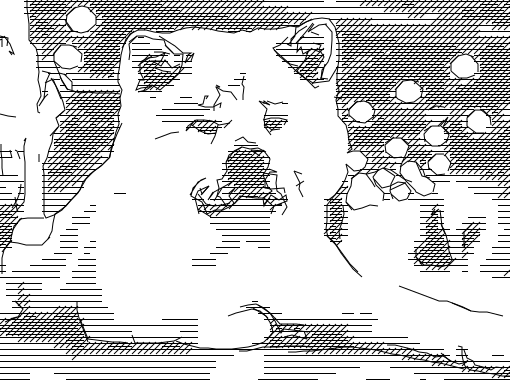

Если же Вы хотите стилизовать изображения,как на картинке ниже, то перейдите по этой ссылке
https://colab.research.google.com/drive/1V94QAkTBjkVPSQMKB27i5cunhRpBFLCa

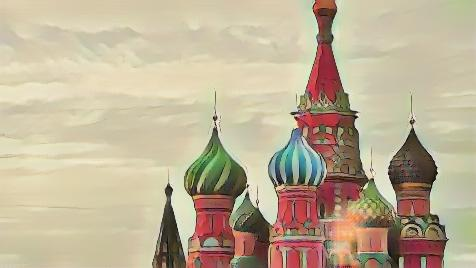

Для того, чтобы выбрать шаблон обложки перейдите по этой ссылке 
https://colab.research.google.com/drive/1WpcWoRqSl09WWRBARRx_63IbcfZQDk6X#scrollTo=O1Pp5vX0UnII

# Подготовка к генерации изображений

Также стоит отметить, что не всегда фразы, выбранные Вами для скачивания изображений, подойдут для генерации изображений. Если при парсинге Вы можете выбирать сразу все объекты, которые хотите поместить на обложку, то для генерации все слова и словосочетания должны относиться к одному объекту. Поэтому Вы можете 

In [ ]:
!sudo googleimagesdownload -kf text_words.txt --format jpg -i "generation_google_photos"
!sudo googleimagesdownload -kf text_words_english.txt --format jpg -i "generation_google_photos"
!sudo googleimagesdownload -kf phrases.txt --format png -i "generation_google_photos"
!sudo googleimagesdownload -kf phrases_english.txt --format png -i "generation_google_photos"

In [ ]:
my_file1=open('/content/text_words_english.txt')
for line in my_file1:
  query = line.split()[0]
  url="http://www.bing.com/images/search?q=" + query + "&FORM=HDRSC2"
  #query=""
  soup = get_soup(url,header)
  ActualImages=[]# contains the link for Large original images, type of  image
  for a in soup.find_all("a",{"class":"iusc"}):
     print(a)
     m = json.loads(a["m"])
     murl = m["murl"]
     turl = m["turl"]
     
     image_name = urllib.parse.urlsplit(murl).path.split("/")[-1]
     print(image_name)
     ActualImages.append((image_name, turl, murl))
  print("there are total" , len(ActualImages),"images")
  if not os.path.exists(DIR):
    os.mkdir(DIR)
    
  DIR = os.path.join(DIR, query.split()[0])
  if not os.path.exists(DIR):
    os.mkdir(DIR)
    
  for i, (image_name, turl, murl) in enumerate(ActualImages):
    try:
        #req = urllib2.Request(turl, headers={'User-Agent' : header})
        #raw_img = urllib2.urlopen(req).read()
        #req = urllib.request.Request(turl, headers={'User-Agent' : header})
        raw_img = urllib.request.urlopen(turl).read()

        cntr = len([i for i in os.listdir(DIR) if image_name in i]) + 1
        #print cntr

        f = open(os.path.join(DIR, image_name), 'wb')
        f.write(raw_img)
        f.close()
    except Exception as e:
        print("could not load : " + image_name)
        print(e)
my_file1.close()

In [ ]:
my_file1=open('/content/phrases_english.txt')
for line in my_file1:
  query = line.split()[0]+"+"+line.split()[1]
  url="http://www.bing.com/images/search?q=" + query + "&FORM=HDRSC2"
  #query=""
  soup = get_soup(url,header)
  ActualImages=[]# contains the link for Large original images, type of  image
  for a in soup.find_all("a",{"class":"iusc"}):
     print(a)
     m = json.loads(a["m"])
     murl = m["murl"]
     turl = m["turl"]
     
     image_name = urllib.parse.urlsplit(murl).path.split("/")[-1]
     print(image_name)
     ActualImages.append((image_name, turl, murl))
  print("there are total" , len(ActualImages),"images")
  if not os.path.exists(DIR):
    os.mkdir(DIR)
    
  DIR = os.path.join(DIR, query.split()[0])
  if not os.path.exists(DIR):
    os.mkdir(DIR)
    
  for i, (image_name, turl, murl) in enumerate(ActualImages):
    try:
        #req = urllib2.Request(turl, headers={'User-Agent' : header})
        #raw_img = urllib2.urlopen(req).read()
        #req = urllib.request.Request(turl, headers={'User-Agent' : header})
        raw_img = urllib.request.urlopen(turl).read()

        cntr = len([i for i in os.listdir(DIR) if image_name in i]) + 1
        #print cntr

        f = open(os.path.join(DIR, image_name), 'wb')
        f.write(raw_img)
        f.close()
    except Exception as e:
        print("could not load : " + image_name)
        print(e)
my_file1.close()

# Генерация человеческих изображений
Также, если персонажи Вашей книги люди, то выполните шаги ниже, чтобы увеличить количество изображений в собираемом датасете, соответственно, улучшить качесвто сгенерированных изображений

Загрузите данные по ссылке ниже на сой Гугл Диск
https://drive.google.com/drive/folders/0BxYys69jI14kSVdWWllDMWhnN2c?usp=drive_open


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
import tarfile

In [ ]:
os.mkdir("images_faces")

In [ ]:
tr=tarfile.open('/content/drive/My Drive/part1.tar.gz')

In [ ]:
tr.extractall(r'/content/images_faces')

In [ ]:
tr2=tarfile.open('/content/drive/My Drive/part2.tar.gz')
tr2.extractall(r'/content/images_faces')

In [ ]:
tr3=tarfile.open('/content/drive/My Drive/part3.tar.gz')
tr3.extractall(r'/content/images_faces')

In [ ]:
from flask import request

In [ ]:
import shutil
import os
import glob

In [ ]:
import os

In [ ]:
os.mkdir("the_people")

In [ ]:
#@title Описание людей, исходя из их возраста и пола
#@markdown Также, чтобы увеличить количество данных в датасете и, соответственно, улучшить качество генерируемых изображений, Вы можете использовать уже собранные датасеты, пока к данному ноутбуку подключен датасет UTKFace. Для сбора дополнительных изображений введите данные в форму ниже. Например, если известно, что возраст персонажа 12 лет, то вводите данные возраста в примерном промежутке от 10-14 лет
gender = "1" #@param {type:"string"}
#@markdown Для введения значения пола "gender"  0-мужской, 1-женский
age = "11" #@param {type:"string"}

#source = '/content/images/part1'
#dest1 = '/content/images_dataset/'

for file in glob.glob('/content/images_faces/part1/*'):
  #print(file)
  if age+'_'+gender in file:
    shutil.move(file, '/content/the_people')


for file in glob.glob('/content/images_faces/part2/*'):
  #print(file)
  if age+'_'+gender in file:
    shutil.move(file, '/content/downloads/the_people')


for file in glob.glob('/content/images_faces/part3/*'):
  #print(file)
  if age+'_'+gender in file:
    shutil.move(file, '/content/downloads/the_people')


#for file in glob.glob('/content/images/part1'):
##    shutil.move(file, '/content/images_dataset')


# a list of file types
#vendors =['/content/images_dataset/part1']

#for file in vendors:
 #    for f in (glob.glob(file)): 
  #       if age+'_'+gender in f: # if apple in name, move to new apple dir
   #          shutil.move(f, '/content/images_dataset')

In [ ]:
from PIL import Image
import multiprocessing, time, os
def resize_img(img_path):
    img = Image.open(os.path.join('/content/the_people',img_path))
    img = img.resize((1024,1024), Image.ANTIALIAS)
    img.save(os.path.join('/content/the_people_1024',img_path)) 

num_processes = multiprocessing.cpu_count()
pool = multiprocessing.Pool(processes=num_processes)
st = time.time()
pool.map(resize_img, os.listdir('/content/the_people'))
print("Execution time: ", time.time()-st)

In [ ]:
!pip install autocrop
from PIL import Image
%matplotlib inline
import os
import sys
import inspect
import matplotlib.pyplot as plt
import PIL



In [ ]:
from autocrop import Cropper

In [ ]:
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [ ]:
os.mkdir("cropped_faces")

In [ ]:
count = 1
for file in glob.glob('/content/the_people_1024/*'):
  loc = file
  c = Cropper(face_percent=70)
  img_array = c.crop(loc)
  #c = [[0]*k*im.width for i in range(k*im.height)]
  cropped_image = Image.fromarray(img_array)
  %cd /content/cropped_faces/
  cropped_image.save(str(count)+'.jpg')
  count+=1
  loc=""

/content/cropped_faces


AttributeError: ignored

In [ ]:
!zip -r /content/downloads/the_object_description_1024.zip /content/downloads/the_object_description_1024

Скачайте файл .zip на свой компьютер, разархивируйте и просмотрите собранные изображения. Удалите те, которые по Вашему мнени. не подходят под Ваще описание персонажа/объекта. Лучше всего, если в собранном датасете будут находиться изображения, как на примерах, приведенных ниже.

**Подходящие изображения**

<img src="https://st3.depositphotos.com/12985790/17379/i/450/depositphotos_173790436-stock-photo-happy-child.jpg" width="300px"/> 

<img src="https://womanway.online/published/publicdata/WOMANWAY/attachments/SC/products_pictures/%D0%B4%D0%B5%D0%B2%D0%BE%D1%87%D0%BA%D0%B0nd.jpg" width="300px"/>

**Неподходящие изображения**

<img src="https://kid-prazdnik.ru/sites/default/files/sjgcko-rrzy1_0.jpg" width="300px"/> 

<img src="https://cotton-and-silk.ru/image/cache/data/25.07.2018/7/1-800x1200.JPG" width="300px"/>



После того,как Вы удалили все неподходящие изображения, переименуйте файлы в папке по их порядковому номеру, загрузите на свой Гугл Диск и приступайте к слудующему шагу.


---

Для того, чтобы собрать собрать изображения для генерации других объектов, перезапустите среду выполнения и выполните код из раздела "Подготовка к генерации изображений"